### Removing points that are so inaccurate they land in the ocean, and assigning an island to each point
 - Island is often assigned to occurrence points (although sometimes not), but are variable in how they are entered (east Maui versus west, diacriticals, etc).  This step will standardized how those are entered.

In [1]:
import os
# changing directory
os.chdir("C:/Users/Kelsey/Documents/rwork/hapi")

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Reading in a shapefile of the Main Islands of Hawaii
MainIslands = gpd.read_file("mainisl_100m_3.shp")

In [4]:
# importing a csv file of plant occurrence records
import pandas as pd
HAPI_OCC = pd.read_csv("HAPI_DISTRIBUTION_OCCURRENCES.1.csv")

C:\Users\Kelsey\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3,6,7,9,10,11,14,15,16,17,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
HAPI_OCC.head(3)

,scientificName,publisher,basisOfRecord,recordNumber,recordedBy,individualCount,lifeStage,reproductiveCondition,degreeOfEstablishment,occurrenceStatus,...,habitat,island,locality,verbatimElevation,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,identifiedBy,identificationVerificationStatus,issue
0,Lepisorus thunbergianus,Natural History Museum (London) Collection Spe...,PRESERVED_SPECIMEN,1886,"Thomas A. (Tom) Ranker, P G. Trapp, C G. Hanson",NaN,NaN,NaN,NaN,NaN,...,Epiphyte in Metrosideros polymorpha-dominated ...,NaN,Nearest Named Place: West Maui Forest Reserve;...,NaN,20.893600,-156.589400,NaN,NaN,NaN,GEODETIC_DATUM_ASSUMED_WGS84
1,Gahnia gahniiformis,Natural History Museum (London) Collection Spe...,PRESERVED_SPECIMEN,1250,Urbain Jean Faurie,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.985002,-157.270269,NaN,St John,NaN,GEODETIC_DATUM_ASSUMED_WGS84
2,Euphorbia olowaluana,Natural History Museum (London) Collection Spe...,PRESERVED_SPECIMEN,19824,"Otto Degener, Toshio Murashige, Greenwell",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.985002,-157.270269,NaN,Daryl Lee Koutnik,NaN,GEODETIC_DATUM_ASSUMED_WGS84


In [6]:
MainIslands.crs

{'init': 'epsg:4326'}

In [7]:
#MainIslands = MainIslands.to_crs({'init': 'epsg:32604'})

In [8]:
MainIslands.head(3)
# it worked!

,isle,geometry
0,Kauai,POLYGON ((-159.3461118057677 21.93637350851169...
1,Niihau,POLYGON ((-160.0730039167078 21.89508810939679...
2,Oahu,POLYGON ((-157.6505686740289 21.29807812207038...


In [9]:
from shapely.geometry import Point

# combine lat and lon column to a shapely Point() object
HAPI_OCC['geometry'] = HAPI_OCC.apply(lambda x: Point((float(x.decimalLongitude), float(x.decimalLatitude))), axis=1)
#converting it into a geodataframe shape file
geo_HAPI_OCC = gpd.GeoDataFrame(HAPI_OCC, geometry= HAPI_OCC['geometry'])

In [10]:
geo_HAPI_OCC.head(3)
# it worked! geometry column added

,scientificName,publisher,basisOfRecord,recordNumber,recordedBy,individualCount,lifeStage,reproductiveCondition,degreeOfEstablishment,occurrenceStatus,...,island,locality,verbatimElevation,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,identifiedBy,identificationVerificationStatus,issue,geometry
0,Lepisorus thunbergianus,Natural History Museum (London) Collection Spe...,PRESERVED_SPECIMEN,1886,"Thomas A. (Tom) Ranker, P G. Trapp, C G. Hanson",NaN,NaN,NaN,NaN,NaN,...,NaN,Nearest Named Place: West Maui Forest Reserve;...,NaN,20.893600,-156.589400,NaN,NaN,NaN,GEODETIC_DATUM_ASSUMED_WGS84,POINT (-156.5894 20.8936)
1,Gahnia gahniiformis,Natural History Museum (London) Collection Spe...,PRESERVED_SPECIMEN,1250,Urbain Jean Faurie,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.985002,-157.270269,NaN,St John,NaN,GEODETIC_DATUM_ASSUMED_WGS84,POINT (-157.270269 20.985002)
2,Euphorbia olowaluana,Natural History Museum (London) Collection Spe...,PRESERVED_SPECIMEN,19824,"Otto Degener, Toshio Murashige, Greenwell",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.985002,-157.270269,NaN,Daryl Lee Koutnik,NaN,GEODETIC_DATUM_ASSUMED_WGS84,POINT (-157.270269 20.985002)


In [11]:
# converting this to the same coordinate system ID as the shapefile
geo_HAPI_OCC.crs = ({'init': 'epsg:4326'})

In [12]:
geo_HAPI_OCC.crs

{'init': 'epsg:4326'}

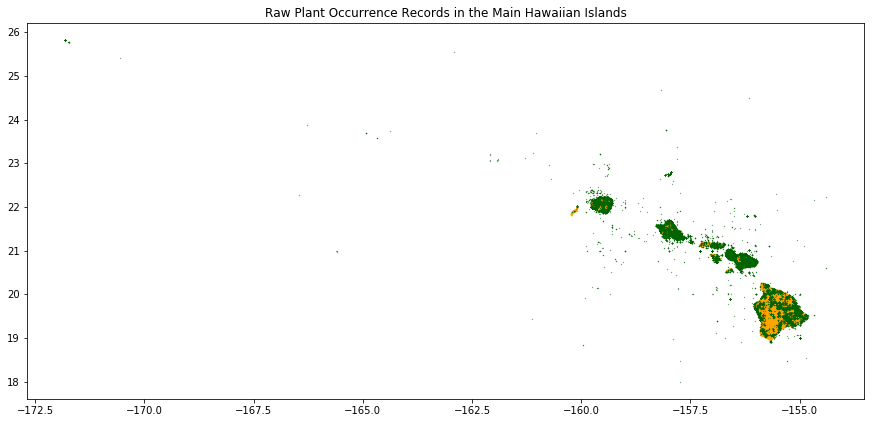

In [13]:
%matplotlib inline 
f, ax1 = plt.subplots(1, figsize=(15, 11))

fig1 = plt.gcf()

MainIslands.plot(color = "orange", ax=ax1)
geo_HAPI_OCC.plot( markersize = 0.05, color = "darkgreen", ax = ax1)
fig1.set_facecolor('white')


plt.title('Raw Plant Occurrence Records in the Main Hawaiian Islands')

plt.show()

Here we see that there are a lot of points that land outside of the islands, even though the island polygons have been buffered + 100m to account for point inaccuracy

In [14]:
geo_HAPI_OCC.shape

(154950, 25)

In [22]:
# spatialling joining the lava risk with and airbnb data using geopandas
geo_HAPI_OCC_onland = gpd.sjoin(geo_HAPI_OCC, MainIslands, how = 'right', op = 'intersects')

In [23]:
geo_HAPI_OCC_onland.shape

(151349, 27)

In [32]:
geo_HAPI_OCC_onland.head(2)

,index_left,scientificName,publisher,basisOfRecord,recordNumber,recordedBy,individualCount,lifeStage,reproductiveCondition,degreeOfEstablishment,...,locality,verbatimElevation,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,identifiedBy,identificationVerificationStatus,issue,isle,geometry
index_right,,,,,,,,,,,,,,,,,,,,,
4,0,Lepisorus thunbergianus,Natural History Museum (London) Collection Spe...,PRESERVED_SPECIMEN,1886,"Thomas A. (Tom) Ranker, P G. Trapp, C G. Hanson",NaN,NaN,NaN,NaN,...,Nearest Named Place: West Maui Forest Reserve;...,NaN,20.8936,-156.5894,NaN,NaN,NaN,GEODETIC_DATUM_ASSUMED_WGS84,Maui,"POLYGON ((-155.997333042764 20.69461569094932,..."
4,11,Solanum haleakalaense,Natural History Museum (London) Collection Spe...,PRESERVED_SPECIMEN,s.n.,Wilhelm B. Hillebrand,NaN,NaN,NaN,NaN,...,Nearest Named Place: South Haleakala,NaN,20.6870,-156.1700,NaN,Donald Henry Roland McClelland,NaN,GEODETIC_DATUM_ASSUMED_WGS84,Maui,"POLYGON ((-155.997333042764 20.69461569094932,..."


In [26]:
geo_HAPI_OCC_onland2 = geo_HAPI_OCC_onland.drop(['geometry'], axis=1)

In [27]:
# combine lat and lon column to a shapely Point() object
geo_HAPI_OCC_onland2['geometry'] = geo_HAPI_OCC_onland2.apply(lambda x: Point((float(x.decimalLongitude), float(x.decimalLatitude))), axis=1)
#converting it into a geodataframe shape file
geo_HAPI_OCC_onland2 = gpd.GeoDataFrame(geo_HAPI_OCC_onland2, geometry= geo_HAPI_OCC_onland2['geometry'])

In [17]:
geo_HAPI_OCC_onland['isle'].unique()

array(['Maui', 'Oahu', 'Kauai', 'Lanai', 'Hawaii', 'Molokai', 'Niihau',
       'Kahoolawe'], dtype=object)

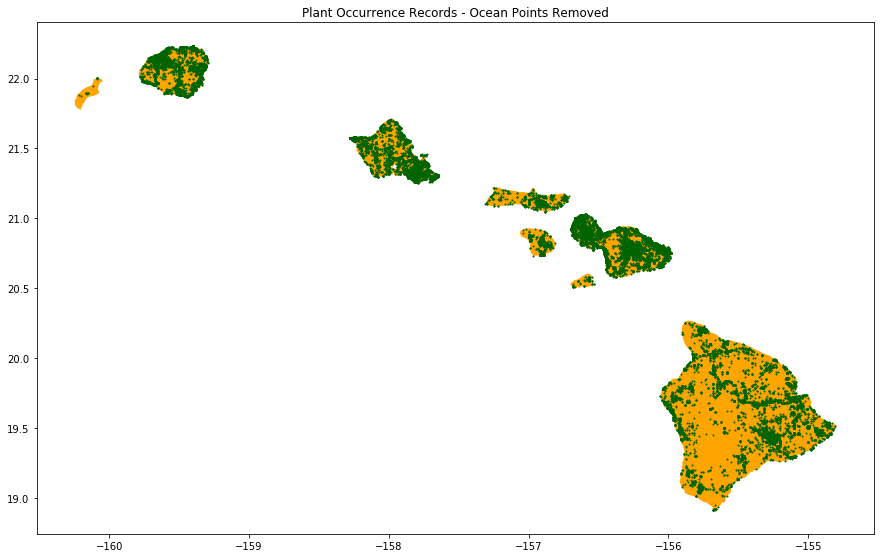

In [29]:
%matplotlib inline 
f, ax1 = plt.subplots(1, figsize=(15, 11))

fig1 = plt.gcf()

MainIslands.plot(color = "orange", ax=ax1)
geo_HAPI_OCC_onland2.plot( markersize = 1, color = "darkgreen", ax = ax1)
fig1.set_facecolor('white')


plt.title('Plant Occurrence Records - Ocean Points Removed')

plt.show()

Only terrestrial points should remain

In [30]:
# of points in the ocean
len(geo_HAPI_OCC)-len(geo_HAPI_OCC_onland2)

3601

In [33]:
export = geo_HAPI_OCC_onland.drop(['geometry'], axis=1)

In [34]:
export.to_csv('de-oceanized_HAPI_OCCURRENCE.csv', index = False)

Exporting as csv to open in R, so we can take advantage of the scrubR package.